In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
from scipy import stats

import seaborn as sns


In [27]:
Data_Directory = './Data/1m2mreadings'

file = Data_Directory + '/rssi_data_20240930_141845_1m.csv'

In [64]:
df = pd.read_csv(file)

# Display the first few rows of the DataFrame
df

,Timestamp,RSSI
0,294441,-72
1,294449,-72
2,294452,-72
3,294458,0
4,294465,-71
...,...,...
1159,306262,-76
1160,306274,-80
1161,306286,-75
1162,306293,-75


#### Drop RSSI = 0 rows and normalise timestamp

In [65]:
df = df.drop(df[df['RSSI'] == 0].index)

# Normalize the Timestamp by subtracting the first value
df['Timestamp'] = df['Timestamp'] - df['Timestamp'].iloc[0]

# Display the resulting DataFrame
df

,Timestamp,RSSI
0,0,-72
1,8,-72
2,11,-72
4,24,-71
5,34,-72
...,...,...
1159,11821,-76
1160,11833,-80
1161,11845,-75
1162,11852,-75


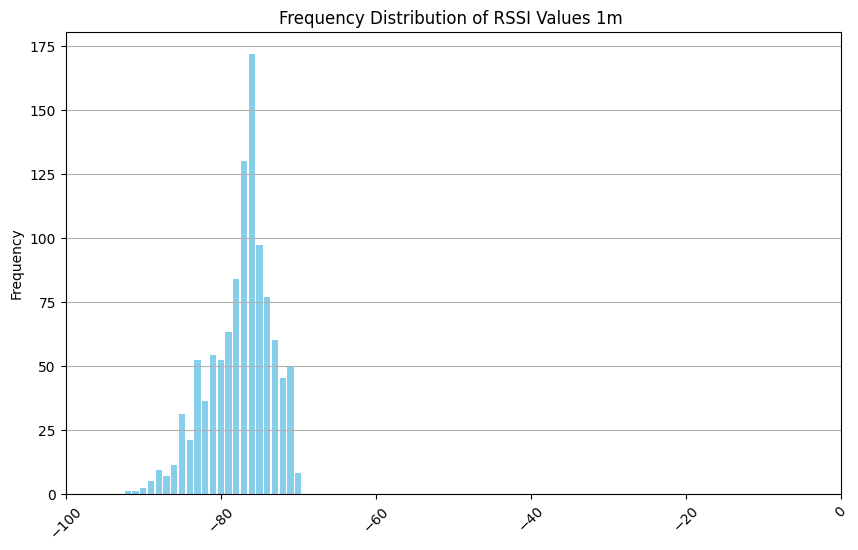

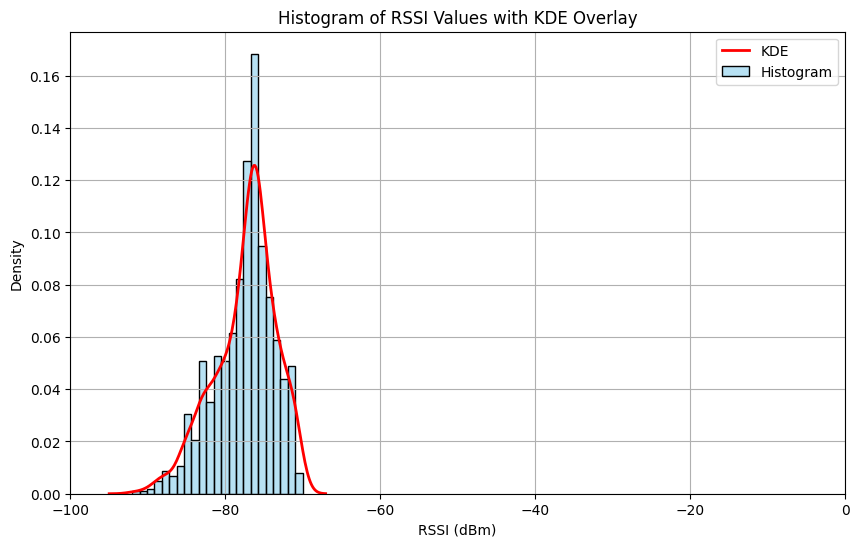

In [66]:
rssi_counts = df['RSSI'].value_counts().sort_index()

# Plot the frequency distribution as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rssi_counts.index, rssi_counts.values, color='skyblue')
plt.xlim(-100, -0)  
plt.ylabel('Frequency')
plt.title('Frequency Distribution of RSSI Values 1m ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

rssi_values1 = df['RSSI'] 

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(rssi_values1, kde=False, color='skyblue', stat='density', label='Histogram', alpha=0.6)
# Overlay the KDE
sns.kdeplot(rssi_values1, color='red', label='KDE', linewidth=2)

# Final plot settings
plt.xlabel('RSSI (dBm)')
plt.ylabel('Density')
plt.title('Histogram of RSSI Values with KDE Overlay')
plt.legend()
plt.grid()
plt.xlim(-100, 0)  # Adjust based on your data range
plt.show()

In [67]:
mean_rssi = np.mean(rssi_values1)
median_rssi = np.median(rssi_values1)
mode_rssi = rssi_values1.mode()[0]

# Finding the 25th and 75th percentiles
q1_rssi = np.percentile(rssi_values1, 25)
q3_rssi = np.percentile(rssi_values1, 75)

print("Mean RSSI:", mean_rssi)
print("Median RSSI:", median_rssi)
print("Mode RSSI:", mode_rssi)
print("25th Percentile (Q1):", q1_rssi)
print("75th Percentile (Q3):", q3_rssi)

Mean RSSI: -77.40636704119851
Median RSSI: -77.0
Mode RSSI: -76
25th Percentile (Q1): -80.0
75th Percentile (Q3): -75.0


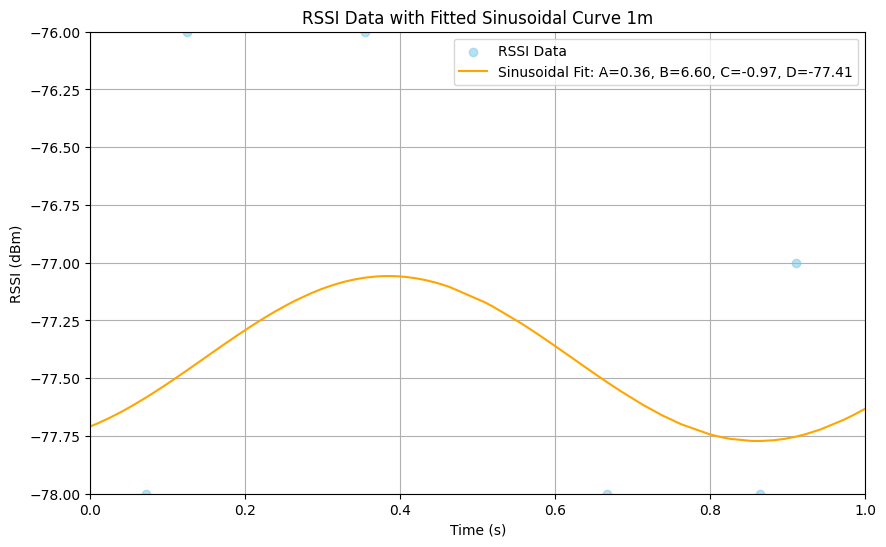

In [68]:
def sinusoidal(t, A, B, C, D):
    return A * np.sin(B * t + C) + D

time_ms = df['Timestamp']  # Time in milliseconds
time = time_ms / 1000  # Convert to seconds for the fitting


# Initial guess for the parameters [Amplitude, Frequency, Phase, Offset]
initial_guess = [1, 2 * np.pi, 0, np.mean(rssi_values1)]

# Perform the curve fitting
params, params_covariance = curve_fit(sinusoidal, time, rssi_values1, p0=initial_guess)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(time, rssi_values1, label='RSSI Data', color='skyblue', alpha=0.6)

# Plot the fitted sinusoidal curve
fitted_values = sinusoidal(time, *params)
plt.plot(time, fitted_values, label=f'Sinusoidal Fit: A={params[0]:.2f}, B={params[1]:.2f}, C={params[2]:.2f}, D={params[3]:.2f}', color='orange')

# Adjust x-axis to show the time between 0 and 1 second
plt.xlim(0, 1)

# Final plot settings
plt.xlabel('Time (s)')
plt.ylim(-78,-76)
plt.ylabel('RSSI (dBm)')
plt.title('RSSI Data with Fitted Sinusoidal Curve 1m')
plt.legend()
plt.grid()
plt.show()

## 2m distance

In [4]:

file = Data_Directory + '/rssi_data_20240930_141953_2m.csv'



In [5]:
df = pd.read_csv(file)

# Display the first few rows of the DataFrame
df

,Timestamp,RSSI
0,362500,-85
1,362508,-86
2,362517,-88
3,362530,-86
4,362536,-86
...,...,...
2072,380631,0
2073,380642,0
2074,380654,-84
2075,380667,-87


#### Drop RSSI = 0 rows and normalise timestamp

In [6]:
df = df.drop(df[df['RSSI'] == 0].index)

# Normalize the Timestamp by subtracting the first value
df['Timestamp'] = df['Timestamp'] - df['Timestamp'].iloc[0]

# Display the resulting DataFrame
df



,Timestamp,RSSI
0,0,-85
1,8,-86
2,17,-88
3,30,-86
4,36,-86
...,...,...
2069,18105,-82
2071,18121,-84
2074,18154,-84
2075,18167,-87


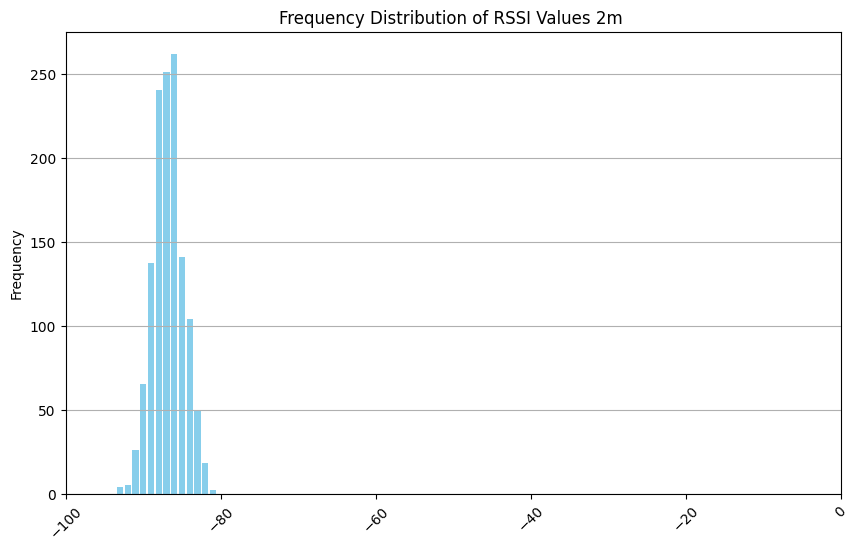

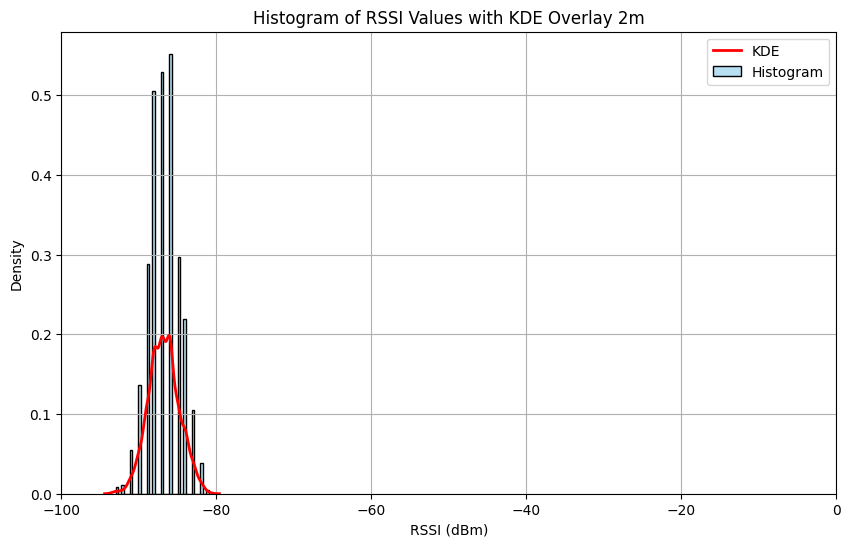

In [72]:
rssi_counts = df['RSSI'].value_counts().sort_index()

# Plot the frequency distribution as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rssi_counts.index, rssi_counts.values, color='skyblue')
plt.xlim(-100, -0)  
plt.ylabel('Frequency')
plt.title('Frequency Distribution of RSSI Values 2m ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
# Show the plot
plt.show()

rssi_values2 = df['RSSI'] 

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(rssi_values2, kde=False, color='skyblue', stat='density', label='Histogram', alpha=0.6)
# Overlay the KDE
sns.kdeplot(rssi_values2, color='red', label='KDE', linewidth=2)

# Final plot settings
plt.xlabel('RSSI (dBm)')
plt.ylabel('Density')
plt.title('Histogram of RSSI Values with KDE Overlay 2m')
plt.legend()
plt.grid()
plt.xlim(-100, 0)  # Adjust based on your data range
plt.show()

In [73]:
mean_rssi = np.mean(rssi_values2)
median_rssi = np.median(rssi_values2)
mode_rssi = rssi_values2.mode()[0]

# Finding the 25th and 75th percentiles
q1_rssi = np.percentile(rssi_values2, 25)
q3_rssi = np.percentile(rssi_values2, 75)

print("Mean RSSI:", mean_rssi)
print("Median RSSI:", median_rssi)
print("Mode RSSI:", mode_rssi)
print("25th Percentile (Q1):", q1_rssi)
print("75th Percentile (Q3):", q3_rssi)

Mean RSSI: -86.77318007662835
Median RSSI: -87.0
Mode RSSI: -86
25th Percentile (Q1): -88.0
75th Percentile (Q3): -86.0


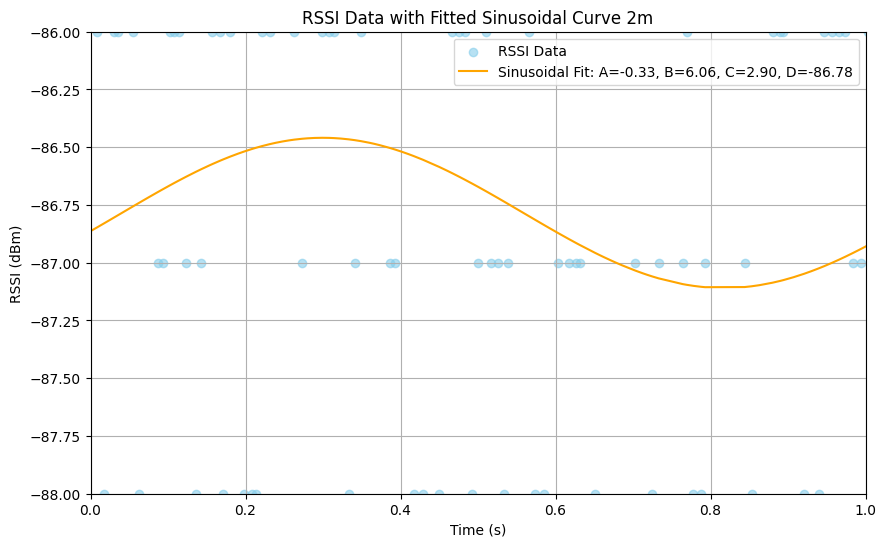

In [74]:
def sinusoidal(t, A, B, C, D):
    return A * np.sin(B * t + C) + D

time_ms = df['Timestamp']  # Time in milliseconds
time = time_ms / 1000  # Convert to seconds for the fitting


# Initial guess for the parameters [Amplitude, Frequency, Phase, Offset]
initial_guess = [1, 2 * np.pi, 0, np.mean(rssi_values2)]

# Perform the curve fitting
params, params_covariance = curve_fit(sinusoidal, time, rssi_values2, p0=initial_guess)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(time, rssi_values2, label='RSSI Data', color='skyblue', alpha=0.6)

# Plot the fitted sinusoidal curve
fitted_values = sinusoidal(time, *params)
plt.plot(time, fitted_values, label=f'Sinusoidal Fit: A={params[0]:.2f}, B={params[1]:.2f}, C={params[2]:.2f}, D={params[3]:.2f}', color='orange')

# Adjust x-axis to show the time between 0 and 1 second
plt.xlim(0, 1)

# Final plot settings
plt.xlabel('Time (s)')
plt.ylim(-88,-86)
plt.ylabel('RSSI (dBm)')
plt.title('RSSI Data with Fitted Sinusoidal Curve 2m')
plt.legend()
plt.grid()
plt.show()

### comparison of the 2 KDEs

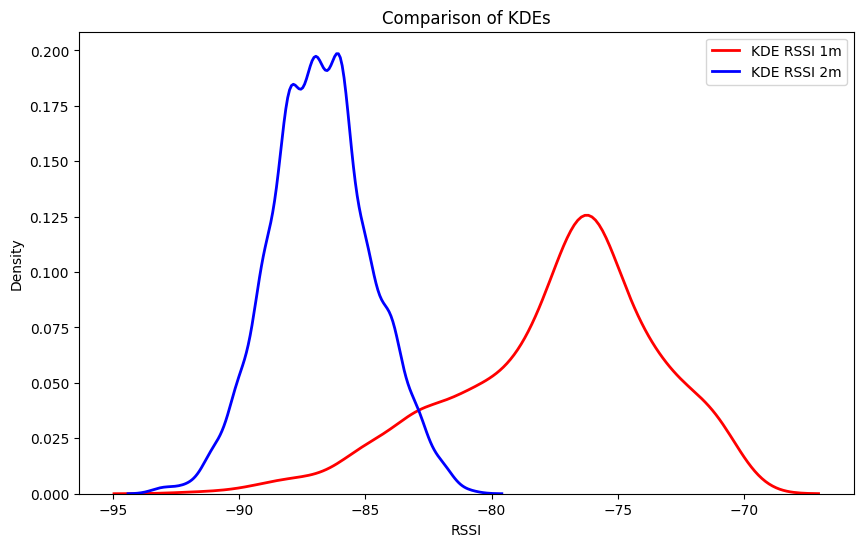

In [75]:
plt.figure(figsize=(10, 6))

# Overlay the KDE plots
sns.kdeplot(rssi_values1, color='red', label='KDE RSSI 1m', linewidth=2)
sns.kdeplot(rssi_values2, color='blue', label='KDE RSSI 2m', linewidth=2)

# Add a title and legend
plt.title('Comparison of KDEs')
plt.legend()

# Show the plot
plt.show()

### Modeling a KDE to 1m and 2m graphs

In [30]:
from scipy.stats import gaussian_kde
import common_utils

column_data = df['RSSI']

# Step 1: Fit a KDE to the column data
kde = gaussian_kde(column_data)
samples = kde.resample(len(column_data)).flatten() 
samples_normalised_2m = samples -np.mean(samples)
print(samples_normalised_2m)

np.savetxt(Data_Directory + '/samples_normalised_2m.txt', samples_normalised_2m)

[-1.48912238  1.11296911  5.08777973 ...  0.6214479  -4.21542827
 -3.68448543]


,RSSI
0,-84.840881
1,-88.030893
2,-84.177005
3,-85.476080
4,-83.380733
...,...
130495,-88.402383
130496,-86.440218
130497,-88.683004
130498,-82.181315
